In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for col in columns:
    print(col['name'], col['type'])
    
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for col in columns:
    print(col['name'], col['type'])
    
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

## Precipitation Analysis
Design a query to retrieve the last 12 months of precipitation data.

Select only the date and prcp values.

Load the query results into a Pandas DataFrame and set the index to the date column.

Sort the DataFrame values by date.

Plot the results using the DataFrame plot method.

In [71]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
# Last data point

last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_data_point = last_data_point[0]
# last_data_point
# '2017-08-23'
one_year_ago = dt.datetime.strptime(last_data_point, "%Y-%m-%d")- dt.timedelta(days=366)
one_year_ago


datetime.datetime(2016, 8, 22, 0, 0)

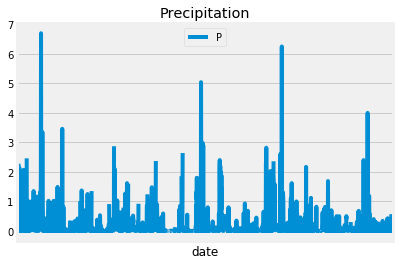

In [14]:

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp)\
                    .filter(Measurement.date >= one_year_ago)\
                    .filter(Measurement.date <= last_data_point).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data)
df = df.set_index('date')
# df = df.fillna(value=0,axis=1)
# Sort the dataframe by date
df = df.sort_values(by="date")
# df.head()

# # Use Pandas Plotting with Matplotlib to plot the data

df.plot(title='Precipitation')
plt.legend(labels = "Percipitation",loc="upper center")
# # plt.savefig('12 Months Precipitation.png')
plt.xticks([])
plt.show()
# plt.tight_layout() 

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

Design a query to calculate the total number of stations.

Design a query to find the most active stations.

List the stations and observation counts in descending order.

Which station has the highest number of observations?

In [24]:
# Design a query to show how many stations are available in this dataset?
number_of_station = session.query(Station.station).count()
number_of_station

9

In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.prcp))\
                                    .group_by(Measurement.station)\
                                    .order_by(func.count(Measurement.prcp).desc()).all()
most_active_stations                                

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [37]:
most_active_station = most_active_stations[0][0]
print(f"Station {most_active_station} has the highest number of observations")

Most active station is USC00519281


In [47]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
top_station_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),  func.avg(Measurement.tobs))\
                    .filter(Measurement.station == most_active_station)\
                    .all()
top_station_data

[(54.0, 85.0, 71.66378066378067)]

In [64]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_one_year = session.query(Measurement.station, Measurement.tobs)\
                                .filter(Measurement.station==most_active_station)\
                                .filter(Measurement.date >=(one_year_ago))\
                                .all()
last_one_year_df = pd.DataFrame(last_one_year)
last_one_year_df.head()


,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


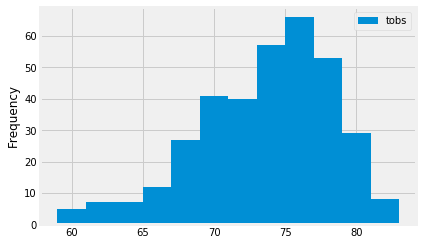

In [67]:

last_one_year_df.plot.hist( bins=12, label="tobs")
plt.show()

In [68]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [116]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# My trip is from 7-1-2019 to 7-15-2019
my_trip = calc_temps('2017-07-01', '2017-07-15')
my_trip_df = pd.DataFrame(my_trip, columns = ['min', 'avg', 'max'])
my_trip_df

    
# my_trip = list(np.ravel(my_trip))

# # List Comprehension Solution
# # ptps = [result[0] for result in results]

# my_trip

# tmin = my_trip[0][0]
# tavg = my_trip[0][1]
# tmax = my_trip[0][2]

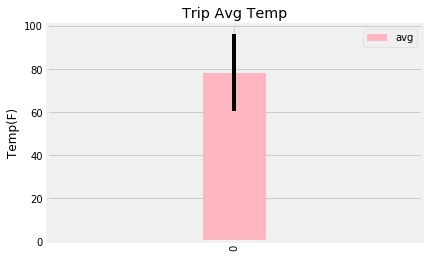

In [120]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

my_trip_df.plot.bar(y = "avg",yerr=tmax-tmin, color="lightpink",width=0.1)
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.show()

In [134]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude,\
                         Station.elevation,func.sum(Measurement.prcp))\
                        .filter(Measurement.station == Station.station)\
                        .filter(Measurement.date>='2017-07-01')\
                        .filter(Measurement.date<='2017-07-15')\
                        .group_by(Measurement.station)\
                        .order_by(func.sum(Measurement.prcp).desc())\
                        .all()
rainfall



[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  2.8700000000000006),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.6400000000000001),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  0.8300000000000001),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.39),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.21),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.13),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
